# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: año de las muestras
* month: número del mes del año para la medición
* day: día del año de la medición
* week: día de la semana como carácter
* temp_2: máxima temperatura en los dos días anteriores
* temp_1: máxima temperatura el día anterior
* average: promedio histórico
* actual: temperatura máxima recogida
* friend: predicción de un amigo, 20 por encima y debajo de la temperatura promedio (no es muy buen amigo)


### 1. Importa el csv "temps.csv"

In [2]:
import pandas as pd

file_path = 'C:/Users/rodri/OneDrive/Escritorio/DATA_SCIENCE/CODIGO_CLASES/TheBridge_DSPT_ML/Supervisado/Clasificación/Arboles de decisión.ipynb/ejercicio/data/temps.csv'
data = pd.read_csv(file_path)
data

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Realiza un análisis exploratorio

In [4]:
data.info() # TIPOS DE DATOS 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [3]:
data.isnull().sum() # NO HAY DATOS FALTANTES 

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

In [5]:
data[data.duplicated()] # NO HAY DATOS DUPLICADOS 

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend


### 3. Realiza la ingeniería de características

Necesitamos que todos los datos sean numéricos.

In [42]:
import pandas as pd # AVERIGUAR LA FUNCION 'label_in_code' 

df_encoded = pd.get_dummies(data,
               columns=["week"],
               dtype=int) 

print(df_encoded)

     year  month  day  temp_2  temp_1  average  actual  forecast_noaa  \
0    2016      1    1      45      45     45.6      45             43   
1    2016      1    2      44      45     45.7      44             41   
2    2016      1    3      45      44     45.8      41             43   
3    2016      1    4      44      41     45.9      40             44   
4    2016      1    5      41      40     46.0      44             46   
..    ...    ...  ...     ...     ...      ...     ...            ...   
343  2016     12   27      42      42     45.2      47             41   
344  2016     12   28      42      47     45.3      48             41   
345  2016     12   29      47      48     45.3      48             43   
346  2016     12   30      48      48     45.4      57             44   
347  2016     12   31      48      57     45.5      40             42   

     forecast_acc  forecast_under  friend  week_Fri  week_Mon  week_Sat  \
0              50              44      29       

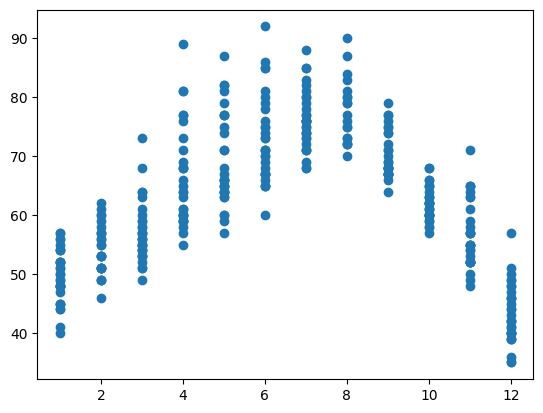

In [8]:
import matplotlib.pyplot as plt

plt.scatter(data['month'], data['actual']);

### 4. Divide en datos de entrenamiento (train) y evaluación (test)

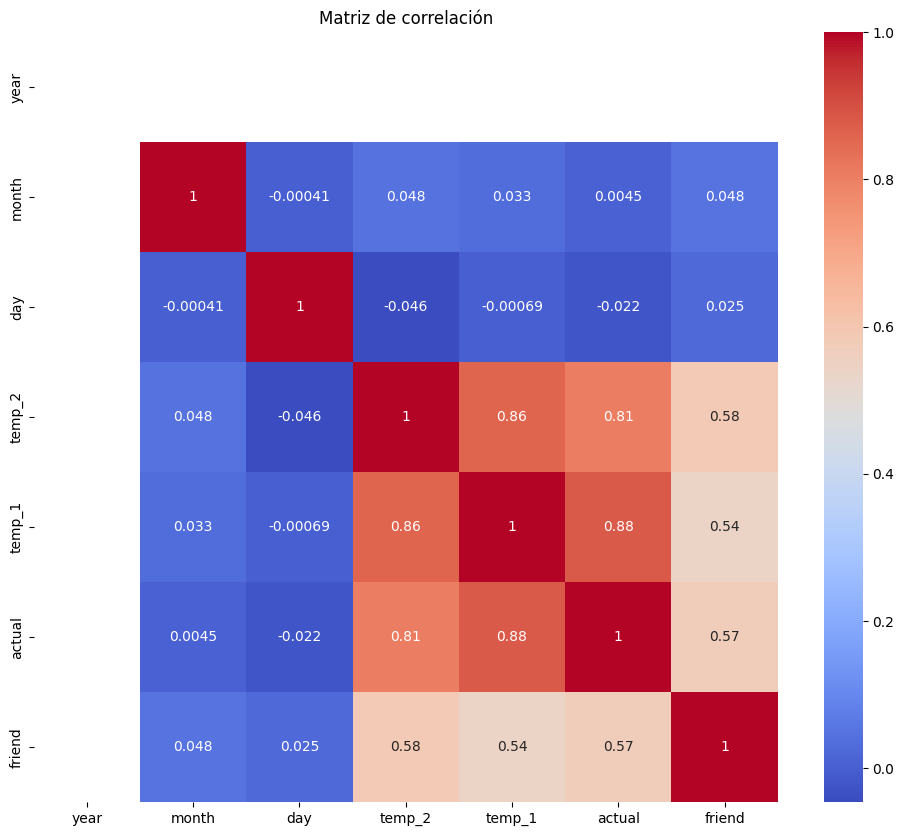

In [38]:
import seaborn as sns

data_corr = data.drop(columns=['week', 'average', 'forecast_acc', 'forecast_under', 'forecast_noaa'])

corr_matrix = data_corr.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [31]:
predictors = corr_matrix['actual'].abs().sort_values(ascending=False).index[1:3]
print(f'Principales predictores de log_area: {predictors}')

Principales predictores de log_area: Index(['temp_1', 'temp_2'], dtype='object')


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[predictors]
y = data['actual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # MUESTRA LA FORMA DE LOS CONJUNTOS DE DATOS 

(243, 2) (105, 2) (243,) (105,)


### 5. Entrena el modelo

Juega con los parámetros para ver qué ajuste obtienes.

In [44]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=42)

In [46]:
y_pred = model.predict(X_test) 
y_pred 

array([67.5, 68. , 51. , 60. , 70. , 82.5, 79. , 83. , 59. , 71. , 60. ,
       83. , 35. , 63. , 74. , 64. , 60. , 57. , 61. , 74. , 59. , 55. ,
       60. , 61. , 57. , 51. , 68. , 57. , 58. , 69. , 72. , 71. , 64. ,
       88. , 75. , 61. , 52. , 49. , 67. , 51. , 77. , 54. , 71. , 40. ,
       56. , 82.5, 56. , 64. , 51. , 41. , 49. , 40. , 64. , 63. , 75. ,
       60. , 54.5, 58. , 57. , 51. , 70. , 49. , 68. , 74. , 60. , 61. ,
       73. , 67.5, 72. , 42. , 83. , 55. , 64. , 49. , 56. , 64. , 49. ,
       73. , 49. , 56. , 49. , 77. , 73. , 74. , 71. , 51. , 49. , 73.5,
       61. , 67. , 59. , 52. , 57. , 52. , 73. , 35. , 44. , 51. , 68. ,
       73. , 35. , 75. , 65. , 51.5, 73. ])

### 6. Evaluación de tu modelo

Calcula las métricas vistas para variable continua (MAE, MAPE, MSE, RMSE)

In [48]:
import numpy as np 

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}') 

MAE: 4.5285714285714285
MSE: 36.61666666666667
RMSE: 6.051170685633208
MAPE: 7.166522493505921


### 7. Representa el árbol de decisión

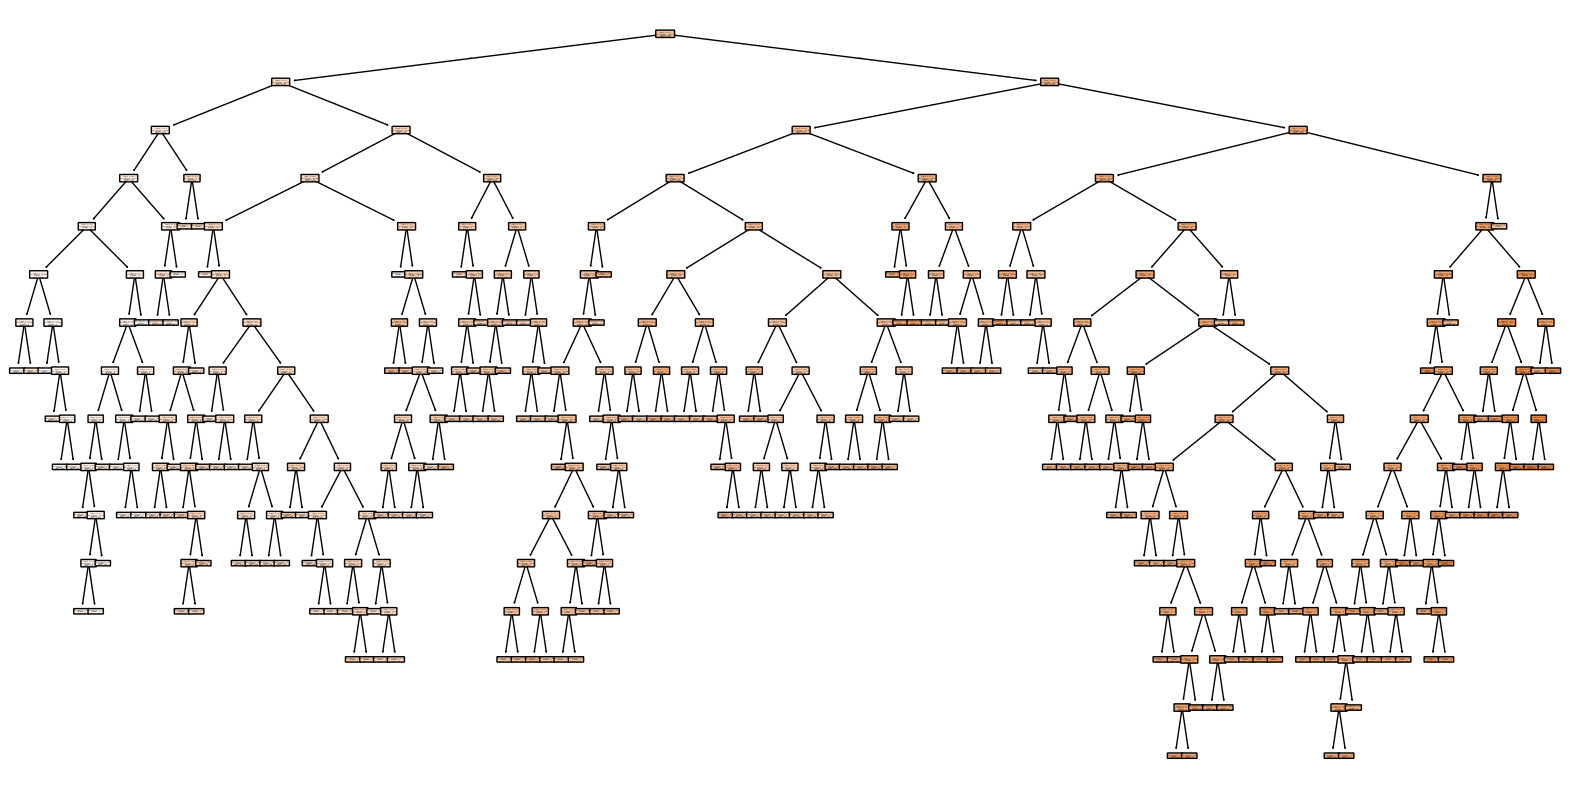

In [52]:
'''
- from sklearn import tree: Importa el módulo tree de scikit-learn que contiene herramientas para trabajar con árboles de decisión.
- from sklearn.tree import DecisionTreeRegressor: Importa la clase DecisionTreeRegressor que se usa para crear y entrenar un modelo de regresión basado en un árbol de decisión.
- import matplotlib.pyplot as plt: Importa matplotlib.pyplot, una librería para crear visualizaciones en Python.

- tree.plot_tree(model, ...):
  - model: Se asume que model es una instancia de un modelo de árbol de decisión que ya ha sido entrenado (por ejemplo, un DecisionTreeRegressor).
  - filled=True: Colorea los nodos del árbol según el valor de la variable objetivo (target). Los colores ayudan a visualizar mejor las decisiones tomadas en cada nodo.
  - feature_names=X.columns: Usa los nombres de las características del conjunto de datos X para etiquetar los nodos del árbol. X.columns es una lista de nombres de las características.
  - rounded=True: Redondea los bordes de los nodos para una visualización más amigable
  '''


from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt  

plt.figure(figsize=(20,10)) 
tree.plot_tree(model, filled=True, feature_names=X.columns, rounded=True) 
plt.show() 

### 8. Utiliza un grid search con cross validation para hiperparametrizar tu modelo 

In [53]:
'''Este código realiza una búsqueda de hiperparámetros utilizando Grid Search con validación cruzada para optimizar un modelo de regresión basado en un árbol de decisión
 (DecisionTreeRegressor).

- GridSearchCV es una herramienta de scikit-learn que permite realizar una búsqueda exhaustiva sobre un conjunto especificado de valores de hiperparámetros para un modelo.

- model = DecisionTreeRegressor(): Se crea una instancia del modelo DecisionTreeRegressor. 

- parameters = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_leaf": [2, 5, 10], 
    "min_samples_split": [1, 2, 4]
}: Se define un diccionario llamado parameters que contiene los hiperparámetros a optimizar y sus posibles valores:
  - max_depth: Profundidad máxima del árbol.
  - min_samples_leaf: Número mínimo de muestras requeridas para estar en un nodo hoja.
  - min_samples_split: Número mínimo de muestras requeridas para dividir un nodo. 

- dtr_gs = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1, scoring="neg_mean_absolute_error"): GridSearchCV se inicializa con los siguientes argumentos:
  - estimator=model: El modelo a optimizar (DecisionTreeRegressor).
  - param_grid=parameters: El conjunto de hiperparámetros a probar.
  - cv=5: Número de pliegues para la validación cruzada.
  - n_jobs=-1: Usar todos los núcleos disponibles para paralelizar el cálculo.
  - scoring="neg_mean_absolute_error": Métrica de evaluación a optimizar, en este caso el error absoluto medio negativo. 

- dtr_gs.fit(X_train, y_train): Se ajusta GridSearchCV a los datos de entrenamiento (X_train y y_train). Esto implica probar todas las combinaciones de hiperparámetros y 
seleccionar la mejor combinación basada en la métrica de evaluación. 

- best_model = dtr_gs.best_estimator_: best_model contiene la mejor estimación encontrada por GridSearchCV con los hiperparámetros óptimos. 

- y_pred_best = best_model.predict(X_test): Se realizan predicciones en los datos de prueba (X_test) utilizando el mejor modelo (best_model). 

- mae_best = mean_absolute_error(y_test, y_pred_best)
  mse_best = mean_squared_error(y_test, y_pred_best)
  rmse_best = np.sqrt(mse_best)
  mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100 

 Se calculan varias métricas de rendimiento para evaluar el mejor modelo:
 mae_best: Error absoluto medio (Mean Absolute Error).
 mse_best: Error cuadrático medio (Mean Squared Error).
 rmse_best: Raíz cuadrada del error cuadrático medio (Root Mean Squared Error).
 mape_best: Error porcentual absoluto medio (Mean Absolute Percentage Error). 

'''

from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

# SE DEFINEN LOS PARAMETROS PARA GRID SEARCH 
parameters = {
    "max_depth" : [3, 5, 7, 10],
    "min_samples_leaf": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 4]
}

# SE INICIALIZA GRID SEARCH CON CROSS VALIDATION
dtr_gs = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1, scoring="neg_mean_absolute_error")

# SE AJUSTA GRID SEARCH 
dtr_gs.fit(X_train, y_train) 

# SE OBTIENE EL MEJOR MODELO 
best_model = dtr_gs.best_estimator_ 

# SE REALIZAN PREDICCIONES CON EL MEJOR MODELO 
y_pred_best = best_model.predict(X_test) 

# SE EVALUA EL MEJOR MODELO 
mae_best = mean_absolute_error(y_test, y_pred_best) 
mse_best = mean_squared_error(y_test, y_pred_best) 
rmse_best = np.sqrt(mse_best) 
mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100 

print(f'MAE (Best): {mae_best}')
print(f'MSE (Best): {mse_best}')
print(f'RMSE (Best): {rmse_best}')
print(f'MAPE (Best): {mape_best}') 

MAE (Best): 4.236183912161355
MSE (Best): 25.410347968957172
RMSE (Best): 5.040867779356762
MAPE (Best): 6.787959546108248


In [65]:
'''Este código imprime los mejores parámetros encontrados por el proceso de GridSearchCV y la mejor puntuación obtenida durante la validación cruzada:

- dtr_gs.best_params_: Esta propiedad de la instancia de GridSearchCV contiene el diccionario de los mejores hiperparámetros encontrados durante la búsqueda.
- print(f'Mejores parámetros: {dtr_gs.best_params_}'): Imprime los mejores parámetros en el formato Mejores parámetros: {valor_de_best_params_}. Aquí, best_params_ es el diccionario
  que contiene los hiperparámetros que proporcionaron el mejor rendimiento según la métrica de evaluación. 

- dtr_gs.best_score_: Esta propiedad de la instancia de GridSearchCV contiene la mejor puntuación obtenida durante la validación cruzada utilizando la métrica de evaluación
 especificada (en este caso, neg_mean_absolute_error).
- print(f'Mejor puntuación (neg_mean_squared_error): {dtr_gs.best_score_}'): Imprime la mejor puntuación obtenida en el formato Mejor puntuación (neg_mean_squared_error): {valor_de_best_score_}. 
 Aquí, best_score_ es la mejor puntuación de la métrica de evaluación negativa del error absoluto medio.
'''

# Presenta los mejores parámetros encontrados y su puntuación (deberás inspeccionar la instancia) 
print(f'Mejores parámetros: {dtr_gs.best_params_}')
print(f'Mejor puntuación (neg_mean_squared_error): {dtr_gs.best_score_}') 

Mejores parámetros: {'max_depth': 3, 'min_samples_leaf': 4}
Mejor puntuación (neg_mean_squared_error): -4.270699282312923


In [68]:
'''Este código imprime el mejor estimador encontrado por el proceso de GridSearchCV 

- dtr_gs.best_estimator_: Es una propiedad del objeto GridSearchCV que contiene el modelo (estimador) con la mejor combinación de hiperparámetros encontrados durante la búsqueda. Este
 mejor estimador es el resultado de ajustar el modelo con los hiperparámetros que proporcionaron el mejor rendimiento según la métrica de evaluación definida. 

- print(f'Mejor estimador: {dtr_gs.best_estimator_}') utiliza una f-string para imprimir el mejor estimador encontrado por GridSearchCV. El resultado será una representación textual
 del modelo ajustado con los mejores hiperparámetros. Esta representación incluye la configuración completa del estimador con los valores óptimos de los hiperparámetros.
'''

# Obtén el mejor estimador de la instancia 
print(f'Mejor estimador: {dtr_gs.best_estimator_}')

Mejor estimador: DecisionTreeRegressor(max_depth=3, min_samples_leaf=4)


### 9. Obten el `feature_importances` 

In [75]:
'''Este código extrae e imprime las importancias de las características del mejor modelo encontrado por GridSearchCV.

- best_model.feature_importances_: Esta propiedad del modelo DecisionTreeRegressor (y otros modelos basados en árboles en scikit-learn) contiene un array de importancias de características.
Las importancias de las características indican la contribución relativa de cada característica en la predicción del modelo. Valores más altos indican que la característica tiene
 mayor influencia en las predicciones del modelo. 

- X.columns: Esta propiedad del DataFrame X contiene los nombres de las columnas, es decir, los nombres de las características.
- features es una variable que almacena estos nombres de columnas. 

- El bucle for itera sobre los nombres de las características (features) y sus importancias (feature_importances) al mismo tiempo. z
- zip(features, feature_importances) empareja cada característica con su importancia correspondiente.
- print(f'Característica: {feature}, Importancia: {importance}') imprime cada característica junto con su importancia.

'''

# Obtener la importancia de las características, un número menor que 1 para cada caracteristica 
feature_importances = best_model.feature_importances_ 

# Obtener el nombre de las características 
features = X.columns 

# Imprimir las importancias de las caracteristicas de manera organizada 
for feature_var, importance in zip(features, feature_importances):
    print(f'Característica: {feature_var}, Importancia: {importance}') 

Característica: temp_1, Importancia: 0.9773939810818979
Característica: temp_2, Importancia: 0.022606018918102037


### 10. Construye un nuevo modelo `DecisionTreeClassifier` 

Queremos un modelo que clasifique cuando en un día va a hacer una temperatura mayor a 65ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [69]:
'''Este código realiza un análisis de clasificación utilizando un árbol de decisión (DecisionTreeClassifier) para predecir si la temperatura actual está por encima de 15 grados. 

- df_encoded['temp_above_15'] = (df_encoded['actual'] > 15).astype(int): Crea una nueva columna temp_above_15 en el DataFrame df_encoded donde cada valor es 1 si la temperatura
 actual es mayor a 15 grados y 0 en caso contrario. Esto convierte la tarea en un problema de clasificación binaria. 

- X_class contiene todas las columnas de df_encoded excepto actual y temp_above_15. Estas son las características que se utilizarán para la predicción.
- y_class es la variable objetivo que queremos predecir (temp_above_15). 

- X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42): Divide los datos en conjuntos de entrenamiento (80%)
 y prueba (20%) de manera aleatoria pero reproducible (random_state=42). 

- classifier = DecisionTreeClassifier(random_state=42): Inicializa un clasificador de árbol de decisión con un estado aleatorio fijo para reproducibilidad. 

- param_grid_class = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}: Define los valores de los hiperparámetros que se evaluarán durante la búsqueda en cuadrícula: max_depth (profundidad máxima del árbol), min_samples_split (número mínimo de muestras
 necesarias para dividir un nodo) y min_samples_leaf (número mínimo de muestras que debe tener un nodo hoja). 

- GridSearchCV se usa para encontrar la mejor combinación de hiperparámetros mediante validación cruzada con 5 particiones (cv=5). n_jobs=-1 permite el uso de todos los núcleos disponibles
 del CPU para acelerar el proceso. La métrica de evaluación es accuracy (precisión). 

- grid_search_class.fit(X_train_class, y_train_class): Ajusta el modelo de búsqueda en cuadrícula a los datos de entrenamiento para encontrar la mejor combinación de hiperparámetros. 

- best_classifier = grid_search_class.best_estimator_: Extrae el mejor modelo de la búsqueda en cuadrícula. 

- accuracy = best_classifier.score(X_test_class, y_test_class): Calcula la precisión del mejor modelo en el conjunto de prueba. La precisión es la proporción de predicciones correctas
 entre el total de predicciones realizadas. 

- print(f'La mejor presición del clasificador: {accuracy}'): Imprime la precisión del mejor modelo en el conjunto de prueba. 

'''

from sklearn.tree import DecisionTreeClassifier 

# Crear una nueva columna 'temp_above_15' para clasificación
df_encoded['temp_above_15'] = (df_encoded['actual'] > 15).astype(int)

# Definir características y variable objetivo para clasificación
X_class = df_encoded.drop(columns=['actual', 'temp_above_15'])
y_class = df_encoded['temp_above_15']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Entrenar el modelo DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
param_grid_class = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar Grid Search con Cross Validation
grid_search_class = GridSearchCV(estimator=classifier, param_grid=param_grid_class, cv=5, n_jobs=-1, scoring='accuracy')

# Ajustar Grid Search
grid_search_class.fit(X_train_class, y_train_class)

# Obtener el mejor modelo
best_classifier = grid_search_class.best_estimator_

# Evaluar el mejor modelo
accuracy = best_classifier.score(X_test_class, y_test_class)

print(f'La mejor presición del clasificador: {accuracy}') 

La mejor presición del clasificador: 1.0
